# Machine Learning

### First import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

Since the only hypothesis with identifiable trends is comparing economic growth with crop yield, this is the only hypothesis we will build a model for. We will use microsoft co-pilot to help us build a multi-target regression model that looks at actual vs predicted values.

### Load the clean data

In [2]:
df = pd.read_csv('../data/clean-agriculturedata.csv')
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,Brazil,South East,Rice,2.64,514.15,21.96,0.639,4,15.95,25.39,42.58,85.01,Drought-resistant Crops,116.07
1,1995,India,Punjab,Vegetables,13.98,1940.83,6.11,4.100,6,74.79,33.24,74.95,96.05,Drought-resistant Crops,1026.14
2,1996,Brazil,South,Rice,34.76,247.44,8.42,2.520,2,52.69,6.56,10.86,56.99,Water Management,837.28
3,1994,China,Central,Corn,19.10,2042.70,4.88,1.520,8,93.98,42.48,52.78,65.33,No Adaptation,369.90
4,2018,Nigeria,North Central,Vegetables,-2.34,2716.87,23.37,1.593,6,22.09,41.06,8.44,99.04,Drought-resistant Crops,555.35


### The model built with Microsoft Co-Pilot

R² Score: 0.467
RMSE: 295.13


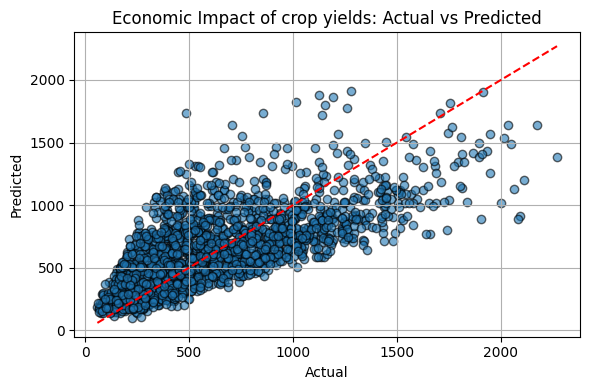

In [8]:
# Select only the two target columns
df_filtered = df[['Crop_Yield_MT_per_HA', 'Economic_Impact_Million_USD']]

# Define features and targets — choose which one predicts the other
X = df_filtered[['Crop_Yield_MT_per_HA']]  # Feature
y = df_filtered['Economic_Impact_Million_USD']  # Target

# Optional: scale if desired
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.2f}")

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Economic Impact of crop yields: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

